In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")
%matplotlib inline


data = pd.read_csv("WorldCups.csv")


In [2]:
data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


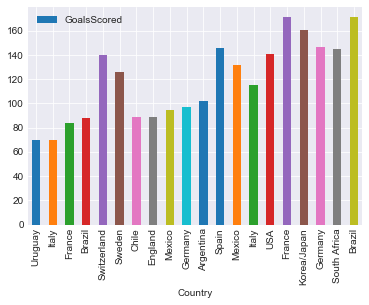

In [3]:

ax = data.plot.bar(x="Country", y="GoalsScored")

ax

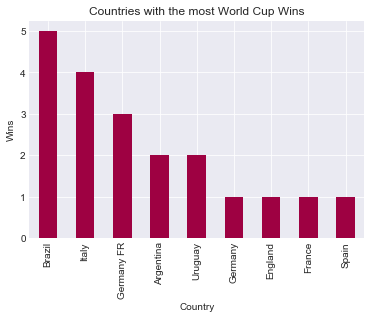

In [4]:
counts_of_winners = data["Winner"].value_counts()
counts_of_winners = pd.DataFrame(counts_of_winners)
counts_of_winners
counts_of_winners.plot.bar(legend=False, colormap="Spectral")
plt.xlabel("Country")
plt.ylabel("Wins")
plt.title("Countries with the most World Cup Wins")



Brazil and Italy seem to have the most wins, with Brazil having 5 wins and Italy having 4.

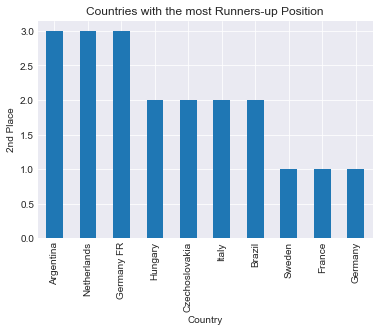

In [5]:
counts_of_2nd = data["Runners-Up"].value_counts()
counts_of_2nd = pd.DataFrame(counts_of_2nd)
counts_of_2nd.plot.bar(legend=False)
plt.xlabel("Country")
plt.ylabel("2nd Place")
plt.title("Countries with the most Runners-up Position")

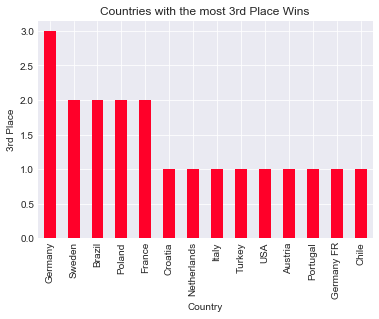

In [6]:
counts_of_3rd = data["Third"].value_counts()
counts_of_3rd = pd.DataFrame(counts_of_3rd)
counts_of_3rd.plot.bar(legend=False, colormap="gist_rainbow")
plt.xlabel("Country")
plt.ylabel("3rd Place")
plt.title("Countries with the most 3rd Place Wins")

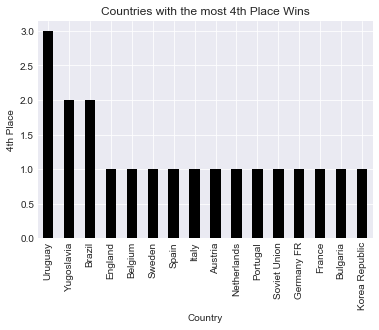

In [7]:
counts_of_4th = data["Fourth"].value_counts()
counts_of_4th = pd.DataFrame(counts_of_4th)
counts_of_4th.plot.bar(legend=False, colormap="cubehelix")
plt.xlabel("Country")
plt.ylabel("4th Place")
plt.title("Countries with the most 4th Place Wins")

In [8]:
fix_attendance = data["Attendance"].astype(str)
fix_attendance = fix_attendance.map(lambda x: x.replace(".", ""))
fix_attendance
data["Attendance"] = fix_attendance.astype("int")



In [9]:
data["Attendance"]

0      590549
1         363
2        3757
3     1045246
4      768607
5       81981
6      893172
7     1563135
8     1603975
9     1865753
10    1545791
11    2109723
12    2394031
13    2516215
14    3587538
15    2785100
16    2705197
17    3359439
18    3178856
19    3386810
Name: Attendance, dtype: int32

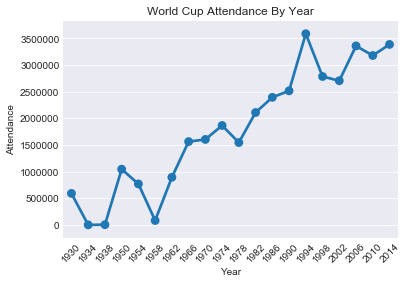

In [10]:
ax = sns.pointplot(x="Year", y="Attendance", data=data)
plt.xticks(rotation=45)
plt.title("World Cup Attendance By Year", loc="center")

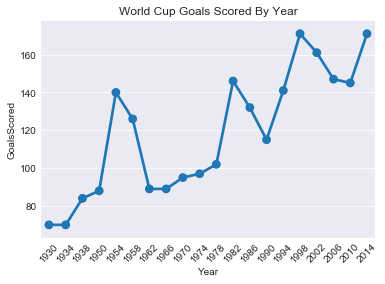

In [11]:
ax = sns.pointplot(x="Year", y="GoalsScored", data=data)
plt.xticks(rotation=45)
plt.title("World Cup Goals Scored By Year", loc="center")

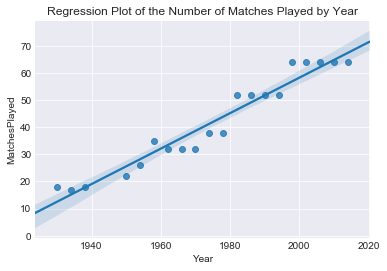

In [12]:
ax = sns.regplot(x=data["Year"], y=data["MatchesPlayed"])
plt.title("Regression Plot of the Number of Matches Played by Year")

Overall the number of matches played has steadily increased each year. The attendance also seemed to increase though there was a massive leap in 1994, which gradually went down then until 2014. In addition the number of goals has overall increased, though there was a peak in 1998. 

In [13]:
data2 = pd.read_csv("WorldCupMatches.csv")

In [14]:
data2.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [15]:
data2.shape

(4572, 20)

In [16]:
home_team_goals = data2["Home Team Goals"].sum()
away_team_goals = data2["Away Team Goals"].sum()

goals = pd.DataFrame({'Home Team Goals': [home_team_goals], 'Away Team Goals': [away_team_goals]})
goals

,Home Team Goals,Away Team Goals
0,1543.0,871.0


Overall the home team scored nearly twice as much as the away team.


In [17]:
def find_winner(df):
    if df["Home Team Goals"] > df["Away Team Goals"]:
        return "Home"
    if df["Home Team Goals"] < df["Away Team Goals"]:
        return "Away"
    return "Tie"
            
    

In [18]:
data2["Winner"] = data2.apply(lambda df: find_winner(df), axis=1)

In [19]:
data2["Winner"] = data2["Winner"][:852]

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 21 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
Winne

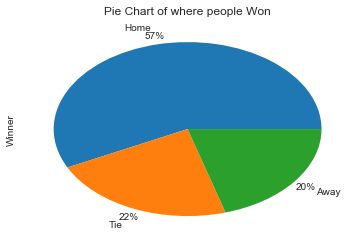

In [21]:
data2["Winner"].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Pie Chart of where people Won")

Home teams won far more than away teams. The percentage of teams that won who were away is close the the percentage of teams who tied.

In [22]:
def find_half_time_leader(df):
    if df["Half-time Home Goals"] > df["Half-time Away Goals"]:
        return "Home"
    if df["Half-time Home Goals"] < df["Half-time Away Goals"]:
        return "Away"
    return "Tie"
            
    

In [23]:
data2["Half Time Leader"] = data2.apply(lambda df: find_half_time_leader(df), axis=1)

In [24]:
data2["Half Time Leader"] = data2["Half Time Leader"][:852]

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 22 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
Winne

In [26]:
def calc_game_change(df):
    if df["Half Time Leader"] == df["Winner"]:
        return "No Comeback"
    else:
        return "Comeback"
    


In [27]:
data2["Change"] = data2.apply(lambda df: calc_game_change(df), axis=1)

In [28]:
data2["Change"] = data2["Change"][:852]

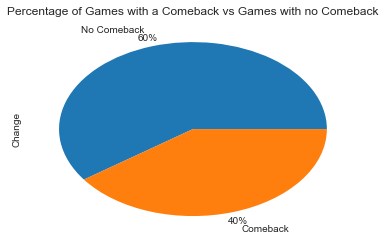

In [29]:
data2["Change"].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Percentage of Games with a Comeback vs Games with no Comeback")

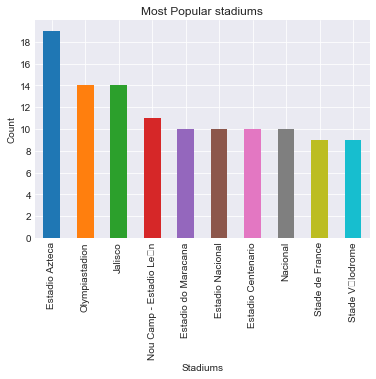

In [30]:
data2["Stadium"].value_counts()[:10].plot.bar(rot=90, yticks=range(0, 20, 2))
plt.title("Most Popular stadiums")
plt.xlabel("Stadiums")
plt.ylabel("Count")


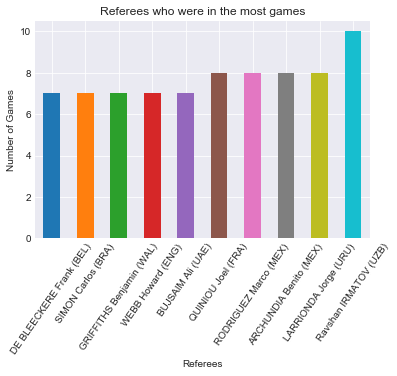

In [31]:
data2["Referee"].value_counts()[:10].sort_values().plot.bar(rot=55)
plt.title("Referees who were in the most games")
plt.ylabel("Number of Games")
plt.xlabel("Referees")

In [32]:
data2["Home Team Name"] = data2["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
data2["Home Team Name"] = data2["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
data2["Home Team Name"] = data2["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
data2["Home Team Name"] = data2["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
data2["Home Team Name"] = data2["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
data2["Home Team Name"] = data2["Home Team Name"].str.replace("Soviet Union","Russia")
data2["Home Team Name"] = data2["Home Team Name"].str.replace("Germany FR","Germany")


In [33]:
data2["Away Team Name"] = data2["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
data2["Away Team Name"] = data2["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
data2["Away Team Name"] = data2["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
data2["Away Team Name"] = data2["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
data2["Away Team Name"] = data2["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
data2["Away Team Name"] = data2["Away Team Name"].str.replace("Soviet Union","Russia")
data2["Away Team Name"] = data2["Away Team Name"].str.replace("Germany FR","Germany")


In [34]:
home_team_matches = data2["Home Team Name"].value_counts().reset_index()
away_team_matches = data2["Away Team Name"].value_counts().reset_index()
home_team_matches.columns = ["Team", "Count"]
away_team_matches.columns = ["Team", "Count"]
matches = pd.concat([home_team_matches, away_team_matches], axis=0)

In [35]:
matches = matches.sort_values(by="Count", ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

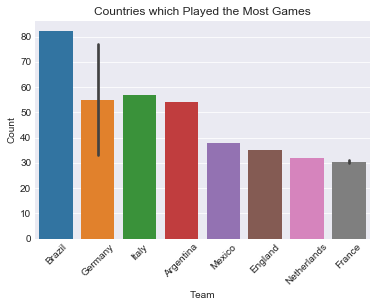

In [36]:
top_10_matches = matches[:10]
g = sns.barplot(x="Team", y="Count", data=top_10_matches)
g.set_title("Countries which Played the Most Games")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

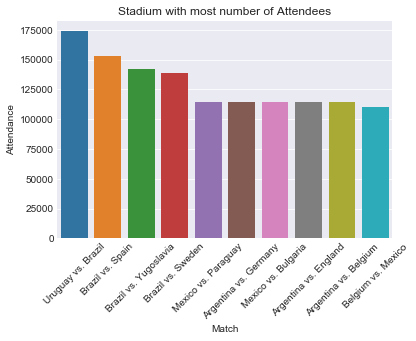

In [37]:
match_attendance = data2.sort_values(by="Attendance", ascending=False)[:10]
match_attendance["Match"] = data2["Home Team Name"] + " vs. " + data2["Away Team Name"]
g = sns.barplot(x="Match", y="Attendance",data=match_attendance)
g.set_title("Stadium with most number of Attendees")
plt.xticks(rotation=45)


In [38]:
data2["Stadium"] = data2["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
data2["Stadium"] = data2["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
avg_stadium_attendance = data2.groupby(by=["Stadium", "City"])["Attendance"].mean().reset_index().sort_values(by="Attendance", ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

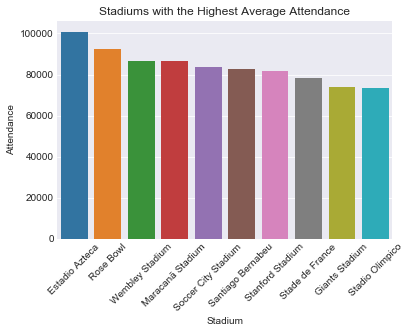

In [39]:
ax = sns.barplot( y="Attendance", x="Stadium", data=avg_stadium_attendance[:10])
ax.set_title("Stadiums with the Highest Average Attendance")
plt.xticks(rotation=45)




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

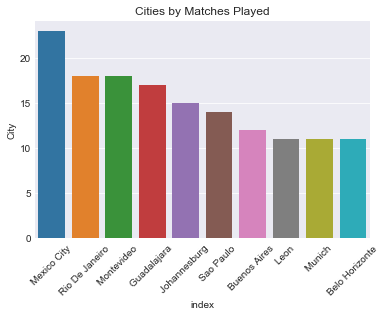

In [40]:
cities_most_matches = data2["City"].value_counts().reset_index()
ax = sns.barplot(x="index", y="City", data=cities_most_matches[:10])
plt.title("Cities by Matches Played")
plt.xticks(rotation=45)


In [41]:
average_attendance_city = data2.groupby(by="City")["Attendance"].mean().reset_index().sort_values(by="Attendance",ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

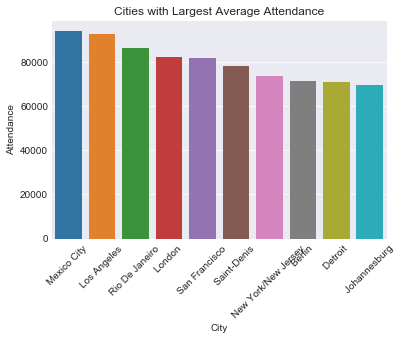

In [42]:
ax = sns.barplot(y = "Attendance", x = "City", data=average_attendance_city[:10])
plt.title("Cities with Largest Average Attendance")
plt.xticks(rotation=45)



In [43]:
home = data2[["Year", "Home Team Name"]]
home.columns = ["year", "team"]
away = data2[["Year", "Away Team Name"]]
away.columns = ["year", "team"]

home_away = pd.concat([home, away], axis=0)

In [44]:
participation = home_away.groupby(["year", "team"]).count().reset_index()

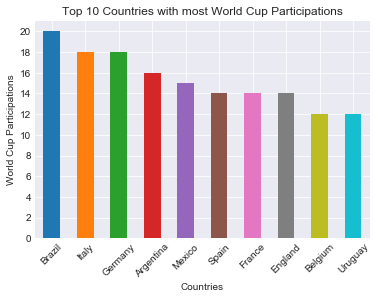

In [45]:
participation["team"].value_counts()[:10].plot.bar(rot=45, yticks=range(0,22, 2))
plt.xlabel("Countries")
plt.ylabel("World Cup Participations")
plt.title("Top 10 Countries with most World Cup Participations")

In [46]:
from wordcloud import WordCloud, STOPWORDS
data3 = pd.read_csv("WorldCupPlayers.csv")


(-0.5, 799.5, 599.5, -0.5)

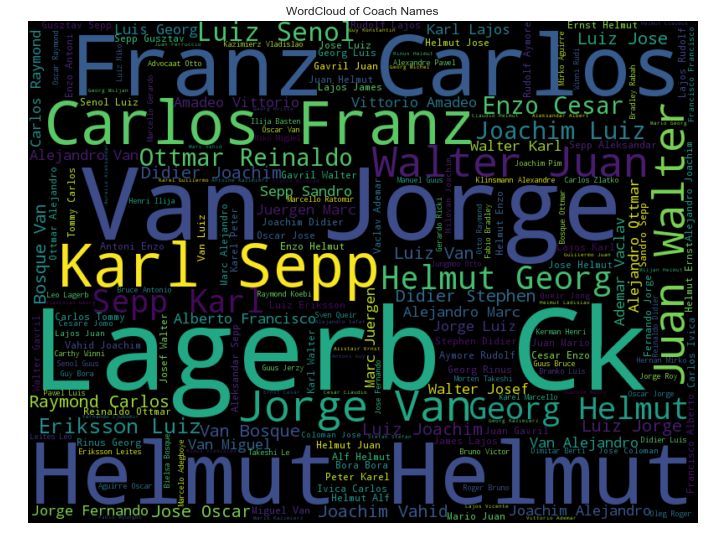

In [47]:
words = data3["Coach Name"].value_counts().keys()
import re
def rem(name):
    return re.sub(r'\(.*\)', '', name)

words_fixed = data3["Coach Name"].apply(rem)
words_fixed = words_fixed.str.title()
words_fixed = words_fixed.apply(lambda x: x.split(" ")[1])
wc = WordCloud(width=800, height=600, background_color="black").generate(" ".join(words_fixed))

wrds1 = data3["Coach Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(12,14))
plt.title("WordCloud of Coach Names")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")


(-0.5, 799.5, 599.5, -0.5)

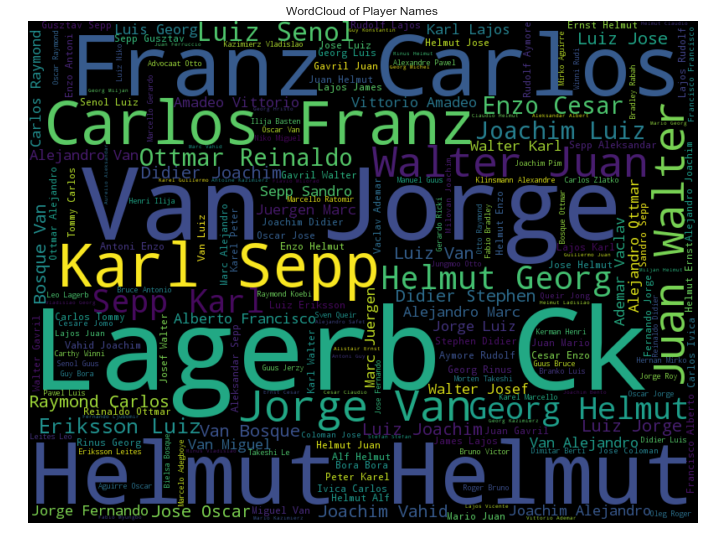

In [48]:
player_names = data3["Player Name"].value_counts().keys()

p_n = data3["Player Name"].str.title()
p_n_fix = p_n.apply(lambda x: x.split(" ")[0])
wc2 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(p_n_fix))
plt.figure(figsize=(12,14))
plt.title("WordCloud of Player Names")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,3757
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,81981
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


In [50]:
data2 = data2.drop(["Win conditions"], axis=1)


In [51]:
data2_no_na = data2.dropna()
data2_no_na

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner,Half Time Leader,Change
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,...,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home,Home,No Comeback
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,...,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home,Home,No Comeback
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,...,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home,Home,No Comeback
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,...,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home,Home,No Comeback
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,...,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home,Tie,Comeback
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,9249.0,...,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX,Home,Home,No Comeback
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,18306.0,...,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL,Home,Tie,Comeback
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,18306.0,...,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR,Home,Home,No Comeback
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,57735.0,...,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER,Home,Tie,Comeback
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,2000.0,...,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA,Home,Tie,Comeback


In [52]:
train, test = train_test_split(data2_no_na, test_size=0.3, random_state=0)

In [53]:
train

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner,Half Time Leader,Change
258,1974.0,26 Jun 1974 - 19:30,Group A,Parkstadion,Gelsenkirchen,Netherlands,4.0,0.0,Argentina,56548.0,...,DAVIDSON Bob (SCO),TSCHENSCHER Kurt (GER),KAZAKOV Pavel (URS),263.0,1948.0,NED,ARG,Home,Home,No Comeback
17,1930.0,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,68346.0,...,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG,Home,Away,Comeback
533,1998.0,16 Jun 1998 - 21:00,Group A,La Beaujoire,Nantes,Brazil,3.0,0.0,Morocco,35500.0,...,LEVNIKOV Nikolai (RUS),DUPANOV Yuri (BLR),WARREN Mark (ENG),1014.0,8742.0,BRA,MAR,Home,Home,No Comeback
667,2006.0,17 Jun 2006 - 15:00,Group D,"FIFA World Cup Stadium, Frankfurt",Frankfurt/Main,Portugal,2.0,0.0,IR Iran,48000.0,...,POULAT Eric (FRA),DAGORNE Lionel (FRA),TEXIER Vincent (FRA),97410100.0,97410024.0,POR,IRN,Home,Tie,Comeback
570,1998.0,30 Jun 1998 - 16:30,Round of 16,Stade du Parc Lescure,Bordeaux,Romania,0.0,1.0,Croatia,31800.0,...,CASTRILLI Javier (ARG),ROSSI Claudio (ARG),PINTO Arnaldo (BRA),1024.0,8780.0,ROU,CRO,Away,Away,No Comeback
308,1982.0,13 Jun 1982 - 20:00,Group 3,Camp Nou,Barcelona,Argentina,0.0,1.0,Belgium,95000.0,...,CHRISTOV Vojtech (TCH),PALOTAI Karoly (HUN),JARGUZ Alojzy (POL),293.0,749.0,ARG,BEL,Away,Tie,Comeback
242,1974.0,18 Jun 1974 - 19:30,Group 1,Olympiastadion,Berlin West,Chile,1.0,1.0,German DR,28300.0,...,ANGONESE Aurelio (ITA),SCHEURER Ruedi (SUI),DAVIDSON Bob (SCO),262.0,2004.0,CHI,GDR,Tie,Tie,No Comeback
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,68034.0,...,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,Away,Away,No Comeback
170,1966.0,12 Jul 1966 - 19:30,Group 3,Goodison Park,Liverpool,Brazil,2.0,0.0,Bulgaria,47308.0,...,TSCHENSCHER Kurt (GER),McCABE George (ENG),TAYLOR John (ENG),238.0,1596.0,BRA,BUL,Home,Home,No Comeback
187,1966.0,19 Jul 1966 - 19:30,Group 4,Ayresome Park,Middlesbrough,Korea DPR,1.0,0.0,Italy,17829.0,...,SCHWINTE Pierre (FRA),ADAIR John (NIR),TAYLOR John (ENG),238.0,1679.0,PRK,ITA,Home,Home,No Comeback


In [54]:
test

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner,Half Time Leader,Change
214,1970.0,07 Jun 1970 - 12:00,Group 3,Jalisco,Guadalajara,Brazil,1.0,0.0,England,66843.0,...,KLEIN Abraham (ISR),YAMASAKI MALDONADO Arturo (MEX),MACHIN Roger (FRA),250.0,1764.0,BRA,ENG,Home,Tie,Comeback
293,1978.0,11 Jun 1978 - 16:45,Group 4,San Martin,Mendoza,Scotland,3.0,2.0,Netherlands,35130.0,...,LINEMAYR Erich (AUT),PALOTAI Karoly (HUN),SEOUDI Hedi (TUN),278.0,2395.0,SCO,NED,Home,Tie,Comeback
241,1974.0,18 Jun 1974 - 19:30,Group 2,Waldstadion,Frankfurt/Main,Scotland,0.0,0.0,Brazil,62000.0,...,VAN GEMERT Arie (NED),PALOTAI Karoly (HUN),LINEMAYR Erich (AUT),262.0,1985.0,SCO,BRA,Tie,Tie,No Comeback
193,1966.0,23 Jul 1966 - 15:00,Quarter-finals,Hillsborough,Sheffield,Germany,4.0,0.0,Uruguay,40007.0,...,FINNEY Jim (ENG),KANDIL Aly Hussein (EGY),PHILLIPS Hugh (SCO),239.0,1660.0,FRG,URU,Home,Home,No Comeback
162,1962.0,10 Jun 1962 - 14:30,Quarter-finals,Estadio El Teniente-Codelco,Rancagua,Czechoslovakia,1.0,0.0,Hungary,11690.0,...,LATYCHEV Nikolaj (URS),BUERGO Fernando (MEX),RUMENTCHEV Dimitar (BUL),232.0,1525.0,TCH,HUN,Home,Home,No Comeback
55,1950.0,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3.0,1.0,USA,9511.0,...,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208.0,1208.0,ESP,USA,Home,Away,Comeback
175,1966.0,13 Jul 1966 - 19:30,Group 4,Roker Park Ground,Sunderland,Italy,2.0,0.0,Chile,27199.0,...,DIENST Gottfried (SUI),FINNEY Jim (ENG),KREITLEIN Rudolf (GER),238.0,1608.0,ITA,CHI,Home,Home,No Comeback
247,1974.0,19 Jun 1974 - 19:30,Group 4,Neckarstadion,Stuttgart,Argentina,1.0,1.0,Italy,70100.0,...,KAZAKOV Pavel (URS),GLOECKNER Rudolf (GDR),RAINEA Nicolae (ROU),262.0,1949.0,ARG,ITA,Tie,Tie,No Comeback
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,59978.0,...,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG,Tie,Tie,No Comeback
392,1986.0,12 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,Northern Ireland,0.0,3.0,Brazil,51000.0,...,KIRSCHEN Siegfried (GER),TRAORE Idrissa (MLI),COURTNEY George (ENG),308.0,441.0,NIR,BRA,Away,Away,No Comeback


In [55]:
from sklearn.feature_selection import RFECV
from sklearn import preprocessing

train.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner,Half Time Leader,Change
258,1974.0,26 Jun 1974 - 19:30,Group A,Parkstadion,Gelsenkirchen,Netherlands,4.0,0.0,Argentina,56548.0,...,DAVIDSON Bob (SCO),TSCHENSCHER Kurt (GER),KAZAKOV Pavel (URS),263.0,1948.0,NED,ARG,Home,Home,No Comeback
17,1930.0,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,68346.0,...,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG,Home,Away,Comeback
533,1998.0,16 Jun 1998 - 21:00,Group A,La Beaujoire,Nantes,Brazil,3.0,0.0,Morocco,35500.0,...,LEVNIKOV Nikolai (RUS),DUPANOV Yuri (BLR),WARREN Mark (ENG),1014.0,8742.0,BRA,MAR,Home,Home,No Comeback
667,2006.0,17 Jun 2006 - 15:00,Group D,"FIFA World Cup Stadium, Frankfurt",Frankfurt/Main,Portugal,2.0,0.0,IR Iran,48000.0,...,POULAT Eric (FRA),DAGORNE Lionel (FRA),TEXIER Vincent (FRA),97410100.0,97410024.0,POR,IRN,Home,Tie,Comeback
570,1998.0,30 Jun 1998 - 16:30,Round of 16,Stade du Parc Lescure,Bordeaux,Romania,0.0,1.0,Croatia,31800.0,...,CASTRILLI Javier (ARG),ROSSI Claudio (ARG),PINTO Arnaldo (BRA),1024.0,8780.0,ROU,CRO,Away,Away,No Comeback


In [56]:
le = preprocessing.LabelEncoder()
train.info()

labels = ["Year", "Datetime", "Stage", "Stadium", "City", "Home Team Name", "Away Team Name", "Referee", "Assistant 1", "Assistant 2", "Home Team Initials", "Away Team Initials", "Winner", "Half Time Leader", "Change"]

for i in labels:
    train[i] = le.fit_transform(train[i])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 258 to 684
Data columns (total 22 columns):
Year                    595 non-null float64
Datetime                595 non-null object
Stage                   595 non-null object
Stadium                 595 non-null object
City                    595 non-null object
Home Team Name          595 non-null object
Home Team Goals         595 non-null float64
Away Team Goals         595 non-null float64
Away Team Name          595 non-null object
Attendance              595 non-null float64
Half-time Home Goals    595 non-null float64
Half-time Away Goals    595 non-null float64
Referee                 595 non-null object
Assistant 1             595 non-null object
Assistant 2             595 non-null object
RoundID                 595 non-null float64
MatchID                 595 non-null float64
Home Team Initials      595 non-null object
Away Team Initials      595 non-null object
Winner                  595 non-null object
Half 

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [57]:
def feature_selection(df):
    #df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["Winner"], axis=1)
    all_y = df["Winner"]
    rfc = RandomForestClassifier(random_state=1)
    select = RFECV(rfc, cv=10)
    select.fit(all_X, all_y)
    best_columns = list(all_X.columns[select.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    return best_columns

In [58]:
cols = feature_selection(train)
cols

Best Columns 
------------
['Home Team Goals', 'Away Team Goals']



['Home Team Goals', 'Away Team Goals']

In [59]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
X_train = train[["Stage", "Stadium", "City", "Home Team Name", "Away Team Name", "Referee", "Assistant 1", "Assistant 2","Half Time Leader"]]
y_train = train["Winner"]
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
for i in labels:
    test[i] = le.fit_transform(test[i])

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
X_test = test[["Stage", "Stadium", "City", "Home Team Name", "Away Team Name", "Referee", "Assistant 1", "Assistant 2","Half Time Leader"]]
y_test = test["Winner"]


In [62]:
predictions = rf.predict(X_test)

In [63]:
mae = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(mae), 8), 'degrees.')


Mean Absolute Error: 0.36078431 degrees.


In [64]:
scores = cross_val_score(rf, X_test, y_test)

In [65]:
scores

array([ 0.68604651,  0.63529412,  0.67857143])

In [66]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.04)


KeyError: 'description'